In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk2-task2-salmon.ipynb")

# Task 2: Wrangling Alaska salmon catch data 

## Instructions 

- First, update the following cell to have a link to *your* Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/lsdixit/eds220-hwk2


- Review the [complete rubric for this task](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- **Every code cell should have a comment.** Err on the side of commenting too much for now. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.

## Acknowledgments

This exercise is based on the [Cleaning and Wrangling Data in R lesson by the NCEAS Learning Hub](https://learning.nceas.ucsb.edu/2023-06-delta/session_11.html).


> Halina Do-Linh, Carmen Galaz García, Matthew B. Jones, Camila Vargas Poulsen. 2023. Open Science Synthesis training Week 1. NCEAS Learning Hub & Delta Stewardship Council.


## About the data

In this task you will use simplified data from the Alaska Department of Fish & Game containing commercial salmon catch data from 1878 to 1997. The original data can be accessed from the KNB repository:

> [Mike Byerly. (2016). Alaska commercial salmon catches by management region (1886-1997).](https://knb.ecoinformatics.org/view/df35b.304.2) Gulf of Alaska Data Portal. df35b.304.2.

The simplified dataset is in CSV format in the homework repository and has the following columns:

| Column | Description |
| ------ | ----------- | 
| Regions | Region code |
| Year | Year fish were caught |
| notesRegCode | Notes and comments |
| Species | Species of salmon caught |
| Catch | Commercial catches of salmon species (in thousands of fish) |

## COMPLETE WORKFLOW

You will use the next code cell to complete the last exercise in the task. Leave it blank for now. 

<Axes: title={'center': 'Mean catch (in thousands) by Region'}, xlabel='Region', ylabel='Catch (in thousands)'>

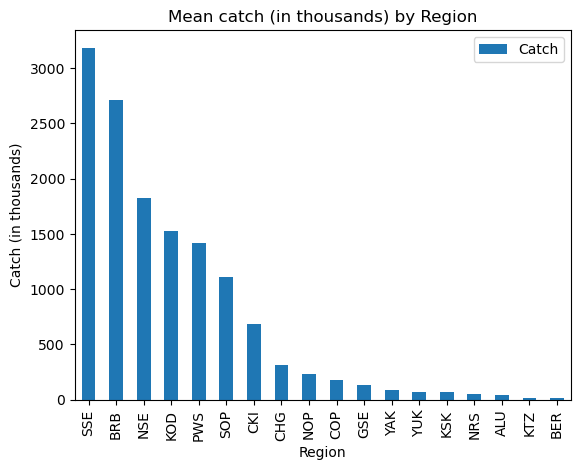

In [2]:
# FINAL CODE

# Import libraries
import pandas as pd

# Read in data set
catch_data = pd.read_csv("data/salmon_data.csv")

# Use `.loc()` to index the correct row and column and assign a new value
catch_data.loc[400, 'Catch'] = '1'

# Update the `Catch` column to be an integer
catch_data['Catch'] = catch_data['Catch'].astype(int)

# Take the average of catch per region sampled
catch_data.groupby('Region') \
          .mean('Catch') \
          .drop(columns = 'Year') \
          .sort_values(by='Catch', ascending=False) \
          .plot(kind = 'bar',
                title = "Mean catch (in thousands) by Region",
                ylabel = "Catch (in thousands)")

## 1

a. Uset this code cell to import the data from the `salmon_data.csv` as `catch_data`. Look at the head of the dataframe. 

<!-- BEGIN QUESTION -->



In [3]:
# Import libraries
import pandas as pd

# Read in data set
catch_data = pd.read_csv("data/salmon_data.csv")

# Check first few rows on data
catch_data.head(3)

,Region,Year,notesRegCode,Species,Catch
0,SSE,1886,NaN,Chinook,0
1,SSE,1887,NaN,Chinook,0
2,SSE,1888,NaN,Chinook,0


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Use this code cell to make some other preliminary data exploration of your choosing.

In [4]:
# Get the data types of each column
print(catch_data.dtypes)

# Get the number of rows and columns 
print(catch_data.shape)

# Find number of unique observations in each column
print(catch_data.nunique())

# Find number of nulls in each column
print(catch_data.isna().sum())

Region          object
Year             int64
notesRegCode    object
Species         object
Catch           object
dtype: object
(8540, 5)
Region            18
Year             120
notesRegCode      29
Species            5
Catch           1879
dtype: int64
Region             0
Year               0
notesRegCode    7125
Species            0
Catch              0
dtype: int64


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Use this markdown cell to explain why you decided to do the exploration in c. and what information you obtained from doing it.

I chose 4 different ways to do some preliminary exploration. First I looked at the data type of each column to see if anything seemed to be read in wrong. The columns look good except for `catch` which should be an `int64` object, and `Year` could be changed into a datetime object if needed. I then looked at the dimensions of the data frame, number of rows and number of columns. This way I can keep track of how much data there is before and after any wrangling that might happen. There are 8539 rows and 5 columns. I took a look at the number of unique values in each column, which return that there were 120 unique years sampled, 18 unique regions, 5 species, and almost 2000 catch instances. I also quickly checked if there are any NAs in the columns, with the only column containing a large amount being the `notesRegCode` column, which is fine. 

<!-- END QUESTION -->

## 2
In the next cell:

a. Store the unique values of the `notesRegCode` column in the `notes_unique` variable. 

In [5]:
# Find unique notes for any observations with notes
notes_unique = catch_data['notesRegCode'].unique()
print(notes_unique)

[nan 'Includes Yakutat catches' 'Yakutat catch included in No SE AK catch'
 'Estimated from canned production, probably sockeye' 'No fishery'
 'Bering River catches included in Copper River catches'
 'Includes Bering River catches; estimated from canned'
 'Includes Bering River catches'
 'Coho and pink catch estimated from canned production'
 'Includes Bering River; coho and pink estimated fro canned'
 'Pink catch estimated from canned'
 'Includes Bering River; coho pink and chum estimated from canned'
 'Includes Bering River; pink estimated from canned'
 'Includes Bering River; pink and chum estimated from canned'
 'Includes Copper River catches'
 'Includes Copper River catches; coho catch porbably mostly pinks'
 'Eshamy District only' 'Estimated from canned; excludes Resurrection Bay'
 'Estimated from canned production' 'No Resurrection Bay fishery'
 'Resurrection bay contribution estimated from canned production'
 'No reported catch'
 'Sockeye and pink and 9922 chum from Port Claren

In [6]:
grader.check("q2a")

q2a results: All test cases passed!

b. Update the dataframe so it doesn't include the `notesRegCode` column. Verify the column is no longer in the dataframe.

In [7]:
# Use `drop()` to drop the columns we do not want and reassign to the original data frame
catch_data = catch_data.drop(columns = 'notesRegCode')

In [8]:
grader.check("q2b")

q2b results: All test cases passed!

<!-- BEGIN QUESTION -->

## 3
Does each column have the expected data type? Use this code cell to obtain this information and write your answer in the next markdown cell.


_Type your answer here, replacing this text._

In [9]:
catch_data.dtypes

Region     object
Year        int64
Species    object
Catch      object
dtype: object

The columns `Region` and `Species`are all dtype 'object', which is expected as they are all columns of string variables. `Catch` should be an int64 object, as it is the whole number of fishes caught in thousands. `Year` is an int64, which is okay but could be transformed into a date time if needed.

<!-- END QUESTION -->

## 4 
The following cell shows a first attempt at updating the `Catch` column to be of data type `int64` instead of `object`. Converting from one data type to another is often called **casting**. 

To do it we use the [`astype()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html) method for `pandas.Series`. The `astype()` method does not modify the `pandas.Series` in place.

Run the next cell and read the end of the error message closely.

In [10]:
catch_data['Catch'].astype('int64')

ValueError: invalid literal for int() with base 10: 'I'

## 5 

The previous error tells us there is a value 'I' (as in the letter 'I') that could not be converted to integer type.  It turns out the original data set was created from a PDF which was automatically converted into a CSV file and this 'I' vlaue should be 1.

In the next cell find the row(s) causing this issue. Show the filtered row(s) as the output. Store your answer in the `catch_I` variable. `catch_I` should have one observation and contain the following columns: Region, Year, Species, Catch. It should contain the original index number in order to pass the test. 

In [11]:
# Index the row of `catch` that is I instead of 1
catch_I = catch_data[catch_data['Catch'] == 'I']
catch_I 

,Region,Year,Species,Catch
400,GSE,1955,Chinook,I


In [12]:
grader.check("q5")

q5 results: All test cases passed!

## 6
In the next cell:

1. Update the value of I to 1.
2. Access the row you updated to verify the value was changed and store this singe row in the `catch_1` variable. 

<!-- BEGIN QUESTION -->



In [13]:
# Use `.loc()` to index the correct row and column and assign a new value
catch_1 = catch_data.loc[400, 'Catch'] = '1'

# Print catch_1
catch_1

'1'

<!-- END QUESTION -->

## 7
In the next cell:

1. Update the `Catch` column in `catch_data` to be of type `int64`.
2. Confirm you have updated the data type. Store the type of the `catch` column in the `catch_column_type` variable.

In [14]:
# Update the incorrect observation in `catch` column from I to 1
catch_data.loc[400, 'Catch'] = '1'

# Change the data type of `Catch` to integer and check the type
catch_column_type = catch_data['Catch'].astype(int).dtype
catch_column_type

dtype('int64')

In [15]:
grader.check("q7")

q7 results: All test cases passed!

<!-- BEGIN QUESTION -->

## 8
Create a data frame with the average salmon catch per region. HINT: use `groupby()`. Store your dataframe in new variable called `avg_region`


In [16]:
# Update the `Catch` column to be an integer
catch_data['Catch'] = catch_data['Catch'].astype(int)

# Take the average of catch per region sampled
avg_region = catch_data.groupby('Region').mean('Catch').drop(columns = 'Year')
avg_region

,Catch
Region,
ALU,40.383908
BER,16.372549
BRB,2709.796491
CHG,315.487273
CKI,683.571429
COP,179.223404
GSE,133.841463
KOD,1528.350000
KSK,67.642353


In [17]:
grader.check("q8")

q8 results: All test cases passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 9 

Use the dataframe you created in 8 to make a bar graph of the estimated average salmon catches by region from 1878 to 1997. The bars in the graph should be ordered by magnitude (increasing or decreasing is ok). Add a title  to your graph and update the axes labels if needed (check the units for the salmon catch). 

<Axes: title={'center': 'Mean catch (in thousands) by Region'}, xlabel='Region', ylabel='Catch (in thousands)'>

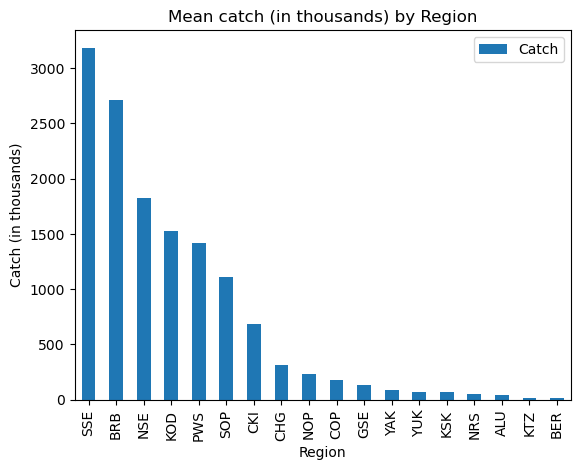

In [18]:
# Sort values so they plot highest to lowest first
avg_region.sort_values(by='Catch', ascending=False).plot(kind = 'bar',
                                                        title = "Mean catch (in thousands) by Region",
                                                        ylabel = "Catch (in thousands)")

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 10

Write a brief description with key takeaways from the plot. Your answer shuld use the complete names for the management areas instead of their codes. You can find what each code stands for in the [original data repository](https://knb.ecoinformatics.org/view/df35b.304.2#df35b.303.1).

The top two regions (Southern Southeast Alaska and Bristol Bay Management Area) each have over 1 million higher catch than the next highest regions. The rest of the regions start at around 1 million less catch than Bristol Bay Management Area and steadily decrease by around 250,000 in a exponential decline, until the region with the smallest catch at less than 100,000 fish in the Bering River Subarea Copper River Subarea region.

<!-- END QUESTION -->

## 11

Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. Further guidance on what to include in this final workflow is in the [assignment rubric](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0).

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [19]:
grader.check_all()

q2a results: All test cases passed!

q2b results: All test cases passed!

q5 results: All test cases passed!

q7 results: All test cases passed!

q8 results: All test cases passed!